# Perceptron

In [4]:
import os
import numpy 
import numpy as np

# Functions that might be useful (please read the documentation)
# x.flatten() (take a N-dimensional numpy array and make it one-dimensional)
# numpy.random.choice -- choose from the list of images
# numpy.dot -- compute the dot product
# numpy.random.normal -- set up random initial weights

In [5]:
import matplotlib.pyplot as plt

In [6]:
DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/"):
    # helper file to help load the images
    # returns a list of numpy vectors
    images = []
    for f in os.listdir(os.path.join(path,str(n))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = numpy.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images
            

# Load up these image files
A = load_image_files(0)
B = load_image_files(1)

N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

# set up some random initial weights
weights = numpy.random.normal(0,1,size=N)

Note that the original images were 28x28 pixels, this function returns “images” of 28x28=784 zeroes and ones, corresponding to whether the image was white or black at a given location, but each “image” is a single vector of length 784 (to make things easier for you).

### 1.

Code and plot are below.

In [44]:
weights = numpy.random.normal(0,1,size=N)

In [42]:
def final_weight(X):
    summ = 0
    for pix in range(len(X)):
        summ += X[pix] * weights[pix]
        
    if summ >= 0:
        return True
    elif summ < 0:
        return False

In [45]:
toplot = []
counter = 0

for i in numpy.arange(0, len(A), 25):
    counter = 0
    
    for zeros in A[i: i + 12]:
        if final_weight(zeros):
            weights -= zeros
            counter += 1

    for ones in B[i: i + 13]:
        if not final_weight(ones):
            weights += ones
            counter += 1
   
    

    toplot += [(25 - counter)/25]
    
    


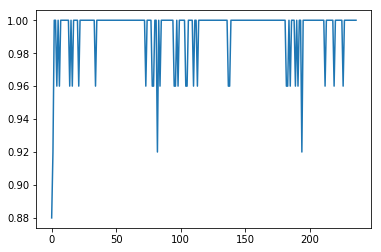

In [46]:
plt.plot(toplot)
plt.show()

### 2.

Yes, it converges (see question 1). This means that "0" and "1" are linearly separable, since the simple perceptron algorithm is able to very effectively distinguish between the two numbers on this feature space. 

### 3. 

Interpretation: The large negative and large positive values means that it is a common place for 0s and 1s to exist (positives correspond to 1s/negatives to 0). The numbers that fall closer to zero indicate that this data is usually not impactful -- 0s and 1s do not usually fall in this region so these regions do not predict anything about the number. The matrix looks roughly like a 0 in the large negatives and a 1 in the large positives which makes sense, give that these are the most important regions for determining the number identity.

In [188]:
A_shaped = numpy.reshape(A, (5923, 28, 28))
B_shaped = numpy.reshape(B, (6742, 28, 28))
weights_shaped = numpy.reshape(weights, (28, 28))


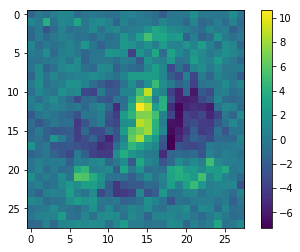

In [47]:
plt.imshow(numpy.reshape(weights, DIM))
plt.colorbar()
plt.show()

### 4. 

I do not expect it to have a great effect on the accuracy of the weights, because the values that are closest to 0 are already non-significant in classifying the 0 and 1. Since the graph below has a sharp drop around 650, we can infer that 650 points are not diagnostic about 0 versus 1, and the remaining 230 are important in discovering if the number is 0 or 1. We know this because once we get to the last 230 points, when they are converted to 0, the accuracy drop by a significant amount.

In [69]:
def final_weight_diff(X, W):
    summ = 0
    for pix in range(len(X)):
        summ += X[pix] * W[pix]
        
    if summ >= 0:
        return True
    elif summ < 0:
        return False

In [116]:
def test_1000_accuracy(weights):
    count = 0
    for zeros in A[:500]:
        if not final_weight_diff(zeros, weights):
            count += 1
    for ones in B[:500]:
        if final_weight_diff(ones, weights):
            count += 1
    return count/1000

In [153]:
accuracy = []
ordered = np.argsort(abs(weights))
reduced_weights = weights

for x in np.arange(10, 781, 10):
    for i in range(len(ordered)):
        if ordered[i] < x:
            reduced_weights[i] = 0
    
    accuracy += [test_1000_accuracy(reduced_weights)]


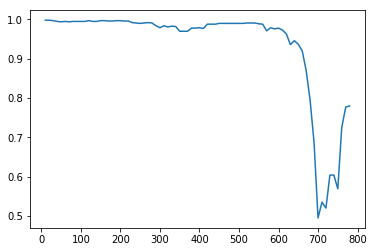

In [155]:
plt.plot(np.arange(10, 781, 10), accuracy)
plt.show()

### 5. 

Yes, I guessed that the numbers that are more similar in shape (3 and 8 for example) would be harder to linearly separate because they share many of the same shapes; this is supported by the matrix below because 3 and 8 are more green, whereas 1 and 6 is very yellow, indicating that the accuracy is very close to 1. Furthermore, it makes sense that the pairs of numbers that are the same are 0.5, because these numbers are the same and cannot be separated linearly, so 0.5 is the number at which it plateaus.


In [50]:
TWO = load_image_files(2)
THR = load_image_files(3)
FOU = load_image_files(4)
FIV = load_image_files(5)
SIX = load_image_files(6)
SEV = load_image_files(7)
EIG = load_image_files(8)
NIN = load_image_files(9)


In [180]:
def train_data(no1, no2):
    weights = numpy.random.normal(0,1,size=N)
    counter = 0
    length = len(no1) if len(no1) < len(no2) else len(no2)

    for i in numpy.arange(0, length, 25):

        for zeros in no1[i: i + 12]:
            if final_weight_diff(zeros, weights):
                weights -= zeros

        for ones in no2[i: i + 13]:
            if not final_weight_diff(ones, weights):
                weights += ones
                
    for num in no1[:500]:
        if not final_weight_diff(num, weights):
            counter += 1
            
    for num in no2[:500]:
        if final_weight_diff(num, weights):
            counter += 1
        
    return counter / 1000

In [181]:
numbers = [A, B, TWO, THR, FOU, FIV, SIX, SEV, EIG, NIN]

In [182]:
tupled_numbs = []

In [183]:
for i in range(len(numbers)):
    trained_data = []
    for j in range(len(numbers)):
        trained_data += [train_data(numbers[i], numbers[j])]
    tupled_numbs += [trained_data] 

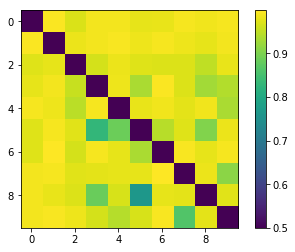

In [187]:
plt.imshow(tupled_numbs)
plt.colorbar()
plt.show()